<a href="https://colab.research.google.com/github/repairedserver/Test/blob/master/%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 86 (delta 17), reused 10 (delta 10), pack-reused 64
Unpacking objects: 100% (86/86), done.


In [ ]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader

directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]
# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
  
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)

    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

In [ ]:
query = '이병헌'
downloader.download(query, limit=40, output_dir='/', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 30)

[Info] Indexing page: 1
[Info] Indexed 40 Images on Page 1.
#1 이미지 다운로드 (https://newsimg.hankookilbo.com/cms/articlerelease/2019/12/19/201912191268771658_2.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://img.asiatoday.co.kr/file/2016y/11m/26d/2016112601002558200176511.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://newsimg.hankookilbo.com/cms/articlerelease/2019/12/19/201912191233015669_3.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99A0D6345BF177AB0A)
[Info] Issue getting: https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&amp;fname=https:%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99A0D6345BF177AB0A
[Error] HTTP Error 403: Forbidden
#4 이미지 다운로드 (http://img.etoday.co.kr/pto_db/2016/09/20160912044835_937908_600_900.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://menu.mt.co.kr/moneyweek/thumb/2017/09/20/06/2017092011308028611_2.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://i.pinimg.c

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 90
테스트 데이터셋 크기: 30
클래스: ['김종국', '마동석', '이병헌']


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from

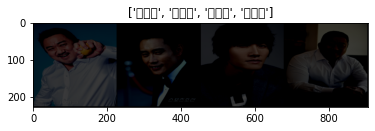

In [ ]:
def imshow(input, title):
  input = input.numpy().transpose((1, 2, 0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  input = std * input * mean
  input = np.clip(input, 0 , 1)

  plt.imshow(input)
  plt.title(title)
  plt.show()

iterator = iter(train_dataloader)

inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
num_epochs = 50
model.train()
start_time = time.time()

for epoch in range(num_epochs):
  running_loss = 0
  running_corrects = 0

  for inputs, labels in train_dataloader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer
    
    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)
 
  epoch_loss = running_loss / len(train_datasets)
  epoch_acc = running_corrects / len(train_datasets) * 100

  print('#{} Loss: {: .4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


#0 Loss:  1.2312 Acc: 26.6667% Time: 41.4790s
#1 Loss:  1.2465 Acc: 34.4444% Time: 85.6120s
#2 Loss:  1.2390 Acc: 31.1111% Time: 129.1455s
#3 Loss:  1.2369 Acc: 30.0000% Time: 170.8885s
#4 Loss:  1.2700 Acc: 27.7778% Time: 212.3903s
#5 Loss:  1.2478 Acc: 31.1111% Time: 253.8739s
#6 Loss:  1.2644 Acc: 32.2222% Time: 295.8037s
#7 Loss:  1.2193 Acc: 28.8889% Time: 339.0726s
#8 Loss:  1.2798 Acc: 33.3333% Time: 383.2805s
#9 Loss:  1.2601 Acc: 31.1111% Time: 426.4315s
#10 Loss:  1.2540 Acc: 32.2222% Time: 470.7741s
#11 Loss:  1.2463 Acc: 32.2222% Time: 515.8262s
#12 Loss:  1.2716 Acc: 32.2222% Time: 559.1948s
#13 Loss:  1.2411 Acc: 30.0000% Time: 602.8921s
#14 Loss:  1.2494 Acc: 31.1111% Time: 646.1702s
#15 Loss:  1.2470 Acc: 27.7778% Time: 689.2105s
#16 Loss:  1.2942 Acc: 28.8889% Time: 731.7009s
#17 Loss:  1.2328 Acc: 28.8889% Time: 772.9682s
#18 Loss:  1.2621 Acc: 28.8889% Time: 813.9299s
#19 Loss:  1.2392 Acc: 28.8889% Time: 855.2913s
#20 Loss:  1.2135 Acc: 31.1111% Time: 896.6820s
#21 